<a href="https://colab.research.google.com/github/ashwin789/my-world/blob/master/BasicOwnCNNModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# matplotlib inline

In [ ]:
# pandas is for - Dataframes based operations - import, export, contact, ploting
# Dataframe - by default columns will be variables & rows will be oberservations
# matplotlib.pyplot - data vizualization software for ML/DL and AI
# Numpy - Array based operations - basic data structures of python
# subpackages :
# scipy.stats - statistics based modelling
# statmodels - Time Series or IOT Based Data Analysis
# Scikit Learn(sklearn) - Machine Learning and Deep Learning in python


In [ ]:
# Deep Learning
import keras
import tensorflow as tf


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(len(train_labels))
print(len(test_labels))

60000
10000


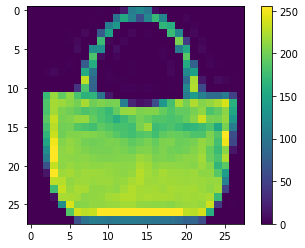

In [ ]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

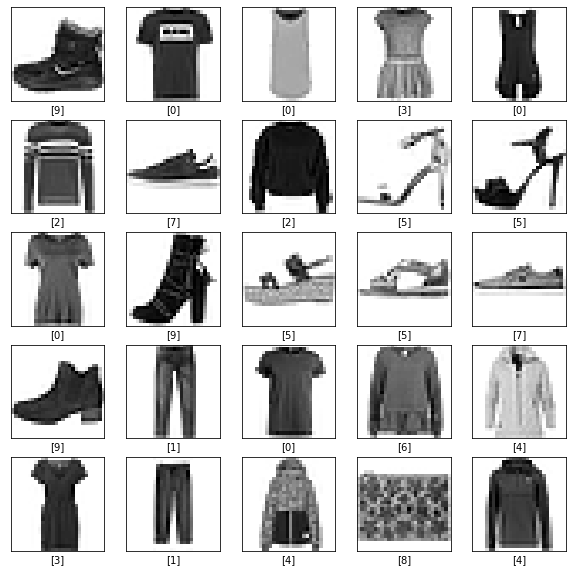

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel([train_labels[i]])
plt.show()

In [ ]:
print(train_images.min())
print(train_images.max())

0
255


In [ ]:
# Normalization of Data must be done for image processing
# Noralize also called as Min-Max Scaler - formula - (X-Xmin)/(Xmax-Xmin)
train_images= train_images/255
test_images= test_images/255

#before normalization the output is in between 0 to 255
#after normalization the ouptput is in between 0 to 1

In [ ]:
print(train_images.min())
print(train_images.max())

0.0
1.0


In [ ]:
# Build a Simple Neural Network - Single Layer Network with 128 Neurons
# sequential is important because layers are sequential

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'] )

In [ ]:
model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 7s 2ms/step - loss: 0.6254 - accuracy: 0.7866
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3844 - accuracy: 0.8629
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3408 - accuracy: 0.8769
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3107 - accuracy: 0.8863
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2917 - accuracy: 0.8920
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2811 - accuracy: 0.8953
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.9010
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2486 - accuracy: 0.9071
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2489 - accuracy: 0.9071
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.232

In [ ]:
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print(test_loss)
print(test_acc)

313/313 - 1s - loss: 0.3760 - accuracy: 0.8898
0.37602677941322327
0.8898000121116638


In [ ]:
# Convolutional Neural Networks -3 parts
# 1) Convolution Layer - source image, task like blurring, sharpening, 
# noise detection, edge detection, etc
# 2) Pooling Layer - reduce the image dimesionally without loosing imp
# features and patterns, Maxpooling
# 3) Fully Connected Layer - Dense Layer in which the results of previous
# 2 laters are fed into neurons to generate prediction



In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.layers import Dense,Dropout,Flatten,Activation


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [ ]:
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
data=fashion_mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# x_train2, x_test2, y_train2, y_test2 = train_test_split(data, test_size=0.30, random_state=123)

In [ ]:
img_rows, img_cols = 28,28

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
num_classes = 10
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation=Activation(tf.nn.softmax)))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer =keras.optimizers.Adadelta(),
              metrics = ('accuracy'))

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1,
          validation_data = (x_test, y_test))

Epoch 1/20
469/469 [==============================] - 43s 34ms/step - loss: 2.2834 - accuracy: 0.1488 - val_loss: 2.2075 - val_accuracy: 0.2379
Epoch 2/20
469/469 [==============================] - 15s 32ms/step - loss: 2.1702 - accuracy: 0.2796 - val_loss: 1.9475 - val_accuracy: 0.4858
Epoch 3/20
469/469 [==============================] - 15s 32ms/step - loss: 1.8277 - accuracy: 0.5093 - val_loss: 1.3645 - val_accuracy: 0.6204
Epoch 4/20
469/469 [==============================] - 15s 32ms/step - loss: 1.2697 - accuracy: 0.6107 - val_loss: 1.0269 - val_accuracy: 0.6443
Epoch 5/20
469/469 [==============================] - 15s 32ms/step - loss: 1.0168 - accuracy: 0.6346 - val_loss: 0.9166 - val_accuracy: 0.6597
Epoch 6/20
469/469 [==============================] - 15s 32ms/step - loss: 0.9262 - accuracy: 0.6555 - val_loss: 0.8637 - val_accuracy: 0.6760
Epoch 7/20
469/469 [==============================] - 15s 32ms/step - loss: 0.8821 - accuracy: 0.6736 - val_loss: 0.8303 - val_accuracy:

In [ ]:
score = model.evaluate(x_test, y_test)
print(score[0], 'Loss')
print(score[1], 'accuracy')

313/313 [==============================] - 2s 6ms/step - loss: 0.6641 - accuracy: 0.7607
0.6641429662704468 Loss
0.760699987411499 accuracy


In [ ]:
# Updated CNN Model

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, kernel_size=3, activation='relu', padding = 'same'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(24, kernel_size=3, activation='relu', padding='same'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10, activation = 'softmax'))
cnn.summary()






Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_12 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 24)        6936      
_________________________________________________________________
dropout_13 (Dropout)         (None, 28, 28, 24)       

In [ ]:
cnn.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
cnn.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128,
        epochs= 20, verbose=1)

Epoch 1/20
469/469 [==============================] - 17s 34ms/step - loss: 0.8291 - accuracy: 0.7136 - val_loss: 0.5709 - val_accuracy: 0.8846
Epoch 2/20
469/469 [==============================] - 15s 33ms/step - loss: 0.3364 - accuracy: 0.8771 - val_loss: 0.2584 - val_accuracy: 0.9066
Epoch 3/20
469/469 [==============================] - 15s 33ms/step - loss: 0.2760 - accuracy: 0.8999 - val_loss: 0.2317 - val_accuracy: 0.9167
Epoch 4/20
469/469 [==============================] - 15s 33ms/step - loss: 0.2401 - accuracy: 0.9120 - val_loss: 0.2153 - val_accuracy: 0.9209
Epoch 5/20
469/469 [==============================] - 15s 33ms/step - loss: 0.2281 - accuracy: 0.9149 - val_loss: 0.2178 - val_accuracy: 0.9210
Epoch 6/20
469/469 [==============================] - 15s 33ms/step - loss: 0.2070 - accuracy: 0.9207 - val_loss: 0.2108 - val_accuracy: 0.9265
Epoch 7/20
469/469 [==============================] - 15s 32ms/step - loss: 0.1919 - accuracy: 0.9270 - val_loss: 0.2107 - val_accuracy:

In [ ]:
cnn.evaluate(x_test, y_test)
# no overfitting problem as train, validation and test accuracies closer

313/313 [==============================] - 2s 6ms/step - loss: 0.2226 - accuracy: 0.9320


[0.22261081635951996, 0.9319999814033508]